In [18]:
import json

import correctionlib

# Carica il file JSON come un CorrectionSet
file_path = "electronSS.json"
evaluator = correctionlib.CorrectionSet.from_file(file_path)

# Elenco delle correzioni disponibili
print("Available corrections:")
print(list(evaluator.keys()))

# Esplorazione dettagliata di ciascuna correzione
for corr in evaluator.values():
    print(f"\nCorrection: {corr.name}")
    print(f"  Number of inputs: {len(corr.inputs)}")
    for ix in corr.inputs:
        print(f"    - Input: {ix.name}")
        print(f"      Type: {ix.type}")
        print(f"      Description: {ix.description}")



Available corrections:
['2022Re-recoE+PromptFG_ScaleJSON', '2022Re-recoE+PromptFG_SmearingJSON']

Correction: 2022Re-recoE+PromptFG_ScaleJSON
  Number of inputs: 6
    - Input: valtype
      Type: string
      Description: correction (total_correction) or uncertainty (total_uncertainty)
    - Input: gain
      Type: int
      Description: seed gain
    - Input: run
      Type: real
      Description: run
    - Input: eta
      Type: real
      Description: supercluster eta
    - Input: r9
      Type: real
      Description: r9
    - Input: et
      Type: real
      Description: et

Correction: 2022Re-recoE+PromptFG_SmearingJSON
  Number of inputs: 3
    - Input: valtype
      Type: string
      Description: correction (total_correction) or uncertainty (total_uncertainty)
    - Input: eta
      Type: real
      Description: supercluster eta
    - Input: r9
      Type: real
      Description: r9


In [19]:
# Supponiamo che 'scale_correction' sia una correzione nel tuo file JSON
correction_name = "2022Re-recoE+PromptFG_ScaleJSON"
correction = evaluator[correction_name]

# Esegui una correzione con valori di esempio
etas = [-1.2, -1.0, -0.8, -0.6, -0.3, 0.0, 0.3, 0.6, 0.8, 1.0, 1.2]
pt = [20.0, 25.0, 30.0, 35.0, 40.0]
R9s = [0.5, 0.7, 0.9, 1.0]
Runs = [357000.0, 357500.0, 358000.0, 358500.0, 359000.0, 359500.0, 360000.0, 360500.0, 361000.0, 361500.0, 362000.0]

# Test inputs: valtype, gain, run, eta, r9, et
test_inputs = ("total_correction", 1, 361000.0, 0.6, 1.0, 20.0)
result = correction.evaluate("total_correction", 1, 361000.0, 0.6, 1.0, 20.0)

print(f"Result of {correction_name} for inputs {test_inputs}: {result}")

Result of 2022Re-recoE+PromptFG_ScaleJSON for inputs ('total_correction', 1, 361000.0, 0.6, 1.0, 20.0): 1.00351


In [20]:
for eta in etas:
    result = correction.evaluate("total_correction", 1, 361000.0, eta, 0.79, 25.0)
    print(f"Result of {correction_name} for eta {eta}: {result}")

Result of 2022Re-recoE+PromptFG_ScaleJSON for eta -1.2: 1.013994
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta -1.0: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta -0.8: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta -0.6: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta -0.3: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta 0.0: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta 0.3: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta 0.6: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta 0.8: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta 1.0: 1.013994
Result of 2022Re-recoE+PromptFG_ScaleJSON for eta 1.2: 1.010577


In [21]:
for Pt in pt:
    result = correction.evaluate("total_correction", 1, 361000.0, 0.0, 1.0, Pt)
    print(f"Result of {correction_name} for Pt {Pt}: {result}")

Result of 2022Re-recoE+PromptFG_ScaleJSON for Pt 20.0: 1.00351
Result of 2022Re-recoE+PromptFG_ScaleJSON for Pt 25.0: 1.00351
Result of 2022Re-recoE+PromptFG_ScaleJSON for Pt 30.0: 1.00351
Result of 2022Re-recoE+PromptFG_ScaleJSON for Pt 35.0: 1.00351
Result of 2022Re-recoE+PromptFG_ScaleJSON for Pt 40.0: 1.00351


In [22]:
for R9 in R9s:
    result = correction.evaluate("total_correction", 1, 361000.0, 0.0, R9, 25.0)
    print(f"Result of {correction_name} for R9: {R9}: {result}")

Result of 2022Re-recoE+PromptFG_ScaleJSON for R9: 0.5: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for R9: 0.7: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for R9: 0.9: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for R9: 1.0: 1.00351


In [23]:
for Run in Runs:
    result = correction.evaluate("total_correction", 1, Run, 0.0, 0.79, 25.0)
    print(f"Result of {correction_name} for Run {Run}: {result}")

Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 357000.0: 1.0
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 357500.0: 1.0
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 358000.0: 1.0
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 358500.0: 1.0
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 359000.0: 1.0
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 359500.0: 1.0
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 360000.0: 1.018804
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 360500.0: 0.990933
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 361000.0: 1.007656
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 361500.0: 1.007218
Result of 2022Re-recoE+PromptFG_ScaleJSON for Run 362000.0: 1.009494


In [24]:
# Test smearing corrections
smearing_name = "2022Re-recoE+PromptFG_SmearingJSON"
smearing_correction = evaluator[smearing_name]

# Test rho (smearing factor)
rho_result = smearing_correction.evaluate("rho", 0.0, 0.79)
print(f"Smearing rho for eta=0.0, r9=0.79: {rho_result}")

# Test uncertainty
err_rho_result = smearing_correction.evaluate("err_rho", 0.0, 0.79)
print(f"Smearing uncertainty for eta=0.0, r9=0.79: {err_rho_result}")

# Test across different eta values
print("\nSmearing values across eta:")
for eta in etas:
    rho = smearing_correction.evaluate("rho", eta, 0.79)
    err_rho = smearing_correction.evaluate("err_rho", eta, 0.79)
    print(f"eta={eta:4.1f}: rho={rho:.5f} ± {err_rho:.6f}")

Smearing rho for eta=0.0, r9=0.79: 0.01476
Smearing uncertainty for eta=0.0, r9=0.79: 7e-05

Smearing values across eta:
eta=-1.2: rho=0.02636 ± 0.000130
eta=-1.0: rho=0.01476 ± 0.000070
eta=-0.8: rho=0.01476 ± 0.000070
eta=-0.6: rho=0.01476 ± 0.000070
eta=-0.3: rho=0.01476 ± 0.000070
eta= 0.0: rho=0.01476 ± 0.000070
eta= 0.3: rho=0.01476 ± 0.000070
eta= 0.6: rho=0.01476 ± 0.000070
eta= 0.8: rho=0.01476 ± 0.000070
eta= 1.0: rho=0.02636 ± 0.000130
eta= 1.2: rho=0.02636 ± 0.000130


In [25]:
# Comprehensive example: applying both scale and smearing corrections
import numpy as np

def apply_corrections(eta, r9, et, run=361000.0, gain=1):
    """
    Apply both scale and smearing corrections to an electron
    
    Parameters:
    - eta: pseudorapidity of the electron supercluster
    - r9: shower shape variable
    - et: transverse energy
    - run: run number (default 361000.0)
    - gain: detector gain (default 1)
    
    Returns:
    - scale_factor: energy scale correction
    - smearing_rho: smearing parameter
    - smearing_uncertainty: uncertainty on smearing
    """
    
    # Get scale correction
    scale_correction = evaluator["2022Re-recoE+PromptFG_ScaleJSON"]
    scale_factor = scale_correction.evaluate("total_correction", gain, run, eta, r9, et)
    
    # Get smearing correction  
    smearing_correction = evaluator["2022Re-recoE+PromptFG_SmearingJSON"]
    smearing_rho = smearing_correction.evaluate("rho", eta, r9)
    smearing_uncertainty = smearing_correction.evaluate("err_rho", eta, r9)
    
    return scale_factor, smearing_rho, smearing_uncertainty

# Example usage
eta_test = 0.0
r9_test = 0.79
et_test = 25.0

scale, rho, err_rho = apply_corrections(eta_test, r9_test, et_test)

print(f"For electron with eta={eta_test}, r9={r9_test}, et={et_test} GeV:")
print(f"  Scale correction factor: {scale:.6f}")
print(f"  Smearing parameter (rho): {rho:.5f} ± {err_rho:.6f}")
print(f"  Corrected energy: {et_test * scale:.2f} GeV")

# Apply to multiple electrons
print("\n" + "="*60)
print("Corrections for multiple electrons:")
print("="*60)
print(f"{'eta':>6} {'r9':>6} {'et':>6} {'scale':>8} {'rho':>8} {'err_rho':>8}")
print("-"*60)

test_electrons = [
    (-1.0, 0.5, 20.0),
    (-0.5, 0.9, 30.0),
    (0.0, 0.79, 25.0),
    (0.5, 0.95, 35.0),
    (1.0, 0.7, 40.0)
]

for eta, r9, et in test_electrons:
    scale, rho, err_rho = apply_corrections(eta, r9, et)
    print(f"{eta:6.1f} {r9:6.2f} {et:6.1f} {scale:8.5f} {rho:8.5f} {err_rho:8.6f}")

For electron with eta=0.0, r9=0.79, et=25.0 GeV:
  Scale correction factor: 1.007656
  Smearing parameter (rho): 0.01476 ± 0.000070
  Corrected energy: 25.19 GeV

Corrections for multiple electrons:
   eta     r9     et    scale      rho  err_rho
------------------------------------------------------------
  -1.0   0.50   20.0  1.00766  0.01476 0.000070
  -0.5   0.90   30.0  1.00766  0.01476 0.000070
   0.0   0.79   25.0  1.00766  0.01476 0.000070
   0.5   0.95   35.0  1.00766  0.01476 0.000070
   1.0   0.70   40.0  1.01399  0.02636 0.000130


Run bin analysis:
Bin edges: [356309, 356900, 357538, 357732, 360000, 360400, 361000, 361600, 362200, 362760]
Central values: [356604.5, 357219.0, 357635.0, 358866.0, 360200.0, 360700.0, 361300.0, 361900.0, 362480.0]
Half-widths: [295.5, 319.0, 97.0, 1134.0, 200.0, 300.0, 300.0, 300.0, 280.0]

Scale corrections for eta=0.7, r9=0.79, et=25.0 GeV:
 Central Run   Half-width    Scale Factor
---------------------------------------------
    356604.5        295.5      1.00000000
    357219.0        319.0      1.00000000
    357635.0         97.0      1.00000000
    358866.0       1134.0      1.00000000
    360200.0        200.0      1.00456500
    360700.0        300.0      0.99093300
    361300.0        300.0      1.00654500
    361900.0        300.0      1.00763900
    362480.0        280.0      1.01584400


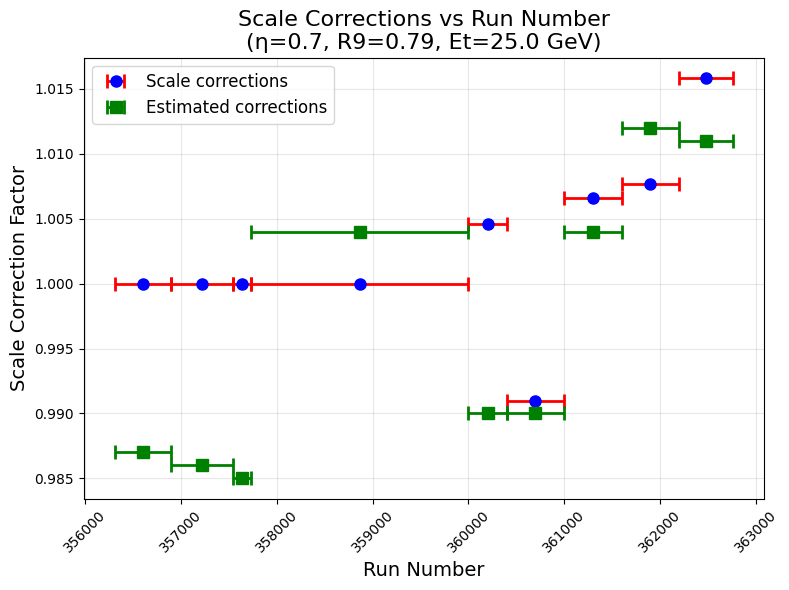


Summary Statistics:
Mean scale correction: 1.00283622
Standard deviation: 0.00652241
Min scale correction: 0.99093300
Max scale correction: 1.01584400
Range: 0.02491100


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Define the run number bins as provided
run_bins = [356309, 356900, 357538, 357732, 360000, 360400, 361000, 361600, 362200, 362760]

estimated_corrections = [0.987, 0.986, 0.985, 1.004, 0.990, 0.990, 1.004, 1.012, 1.011]


# Calculate central values for each bin (midpoint between consecutive runs)
central_runs = []
half_widths = []

for i in range(len(run_bins) - 1):
    central = (run_bins[i] + run_bins[i+1]) / 2
    half_width = (run_bins[i+1] - run_bins[i]) / 2
    central_runs.append(central)
    half_widths.append(half_width)

print("Run bin analysis:")
print("Bin edges:", run_bins)
print("Central values:", central_runs)
print("Half-widths:", half_widths)

# Extract scale corrections for the central run values
# Using fixed parameters: eta=0.0, r9=0.79, et=25.0, gain=1
scale_corrections = []
eta_fixed = 0.7
r9_fixed = 0.79
et_fixed = 25.0
gain_fixed = 1

correction_name = "2022Re-recoE+PromptFG_ScaleJSON"
correction = evaluator[correction_name]

print(f"\nScale corrections for eta={eta_fixed}, r9={r9_fixed}, et={et_fixed} GeV:")
print(f"{'Central Run':>12} {'Half-width':>12} {'Scale Factor':>15}")
print("-" * 45)

for central_run, half_width in zip(central_runs, half_widths):
    scale_factor = correction.evaluate("total_correction", gain_fixed, central_run, eta_fixed, r9_fixed, et_fixed)
    scale_corrections.append(scale_factor)
    print(f"{central_run:12.1f} {half_width:12.1f} {scale_factor:15.8f}")

# Create the plot
plt.figure(figsize=(8, 6))
plt.errorbar(central_runs, scale_corrections, xerr=half_widths, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=8,
             color='blue', ecolor='red', label='Scale corrections')

plt.errorbar(central_runs, estimated_corrections, xerr=half_widths,
             fmt='s', capsize=5, capthick=2, linewidth=2, markersize=8,
             color='green', ecolor='green', label='Estimated corrections')

plt.xlabel('Run Number', fontsize=14)
plt.ylabel('Scale Correction Factor', fontsize=14)
plt.title(f'Scale Corrections vs Run Number\n(η={eta_fixed}, R9={r9_fixed}, Et={et_fixed} GeV)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format the plot
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()

# Add some statistics
mean_scale = np.mean(scale_corrections)
std_scale = np.std(scale_corrections)
# Plot a horizontal line at the mean scale correction value
#plt.axhline(1.001, color='green', linestyle='--', linewidth=2, label=f'Correction from control bin = {mean_scale:.8f}')

plt.legend(fontsize=12)

plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Mean scale correction: {mean_scale:.8f}")
print(f"Standard deviation: {std_scale:.8f}")
print(f"Min scale correction: {min(scale_corrections):.8f}")
print(f"Max scale correction: {max(scale_corrections):.8f}")
print(f"Range: {max(scale_corrections) - min(scale_corrections):.8f}")